In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from tqdm import tqdm
from src.data.load_data import get_hackernews_files, load_hackernews_dataframe

files = get_hackernews_files()
global_user_action_count = None
MIN_USER_ACTIONS = 2

for file_ in tqdm(files):
    try:
        df = load_hackernews_dataframe(file_)
    except MemoryError as _:
        continue
    user_action_count = df.groupby('by').count()['id']
    if global_user_action_count is None:
        global_user_action_count = user_action_count
    else:
        global_user_action_count = global_user_action_count.add(user_action_count, fill_value=0)
    
    # Throw away users with fewer than 3 actions
    global_user_action_count = global_user_action_count[global_user_action_count > MIN_USER_ACTIONS]

100%|██████████| 18/18 [00:38<00:00,  2.12s/it]


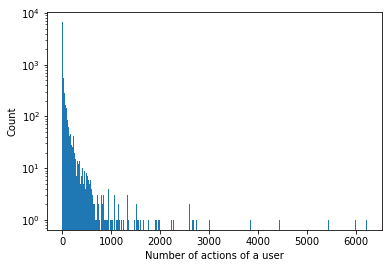

In [2]:
# Plot user action distribution
global_user_action_count.hist(grid=False, bins=1000)
plt.yscale('log', nonposy='clip')
plt.xlabel('Number of actions of a user')
plt.ylabel('Count')
plt.show()